Import the required libraries and load the data
1. Load the required libraries and read the dataset. (1 point)
2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2 point)

In [108]:
from itertools import count

#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [109]:
data = "./data/rent_the_runway.csv"


In [110]:
df = pd.read_csv(data)


In [111]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,"An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,"I rented this dress for a photo shoot. The theme was ""Hollywood Glam and Big Beautiful Hats"". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.",straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a perfect dress for my event and I received so many compliments on it. Not to mention customer service was great getting this to me in less than 24 hours!,NaN,It was a great time to celebrate the (almost) completion of my first year of law school.,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,"I rented this for my company's black tie awards banquet. I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.) I would describe the color as more rose gold than yellow gold. I have blonde hair and fair skin, and the color was very flattering. This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it. I would rent this one again. Highly recommend!",pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,"I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.",athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [112]:
df.shape


(192544, 16)

In [113]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [114]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


Data cleansing and Exploratory data analysis


3. Check if there are any duplicate records in the dataset? If any, drop them. (1)

In [115]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [116]:
# Drop duplicates if any
df = df.drop_duplicates()

In [117]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [118]:
df.shape

(192544, 16)

In [119]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,"An adorable romper! Belt and zipper were a little hard to navigate in a full day of wear/bathroom use, but that's to be expected. Wish it had pockets, but other than that-- absolutely perfect! I got a million compliments.",hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,"I rented this dress for a photo shoot. The theme was ""Hollywood Glam and Big Beautiful Hats"". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event.",straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a perfect dress for my event and I received so many compliments on it. Not to mention customer service was great getting this to me in less than 24 hours!,NaN,It was a great time to celebrate the (almost) completion of my first year of law school.,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,"I rented this for my company's black tie awards banquet. I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.) I would describe the color as more rose gold than yellow gold. I have blonde hair and fair skin, and the color was very flattering. This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it. I would rent this one again. Highly recommend!",pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,"I have always been petite in my upper body and extremely athletic. \nI'm 5'9 and typically am a size 4,6,8 due to the fact I had a smaller upper frame and 34B cup. Depends what fabric were talking about too! \nHowever, because I have been lifting weights my back has grown (odd to add- but figured I'd say it knowing other people lift weights) My lat area is so wide that I was suffocating in a size 6. If I wasn't as muscular in my back I would've been fine. I would recommend to go up a size if you are into lifting weights and very broad in your upper body.",athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)

In [120]:
# Drop columns like 'id', 'review' (adjust based on the actual columns)
df = df.drop(columns=['user_id', 'item_id', 'review_text', 'review_summary', 'review_date'], errors='ignore')


In [121]:
df.shape

(192544, 11)

In [122]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  192544 non-null  int64  
 1   fit         192544 non-null  object 
 2   bust size   174133 non-null  object 
 3   weight      162562 non-null  object 
 4   rating      192462 non-null  float64
 5   rented for  192534 non-null  object 
 6   body type   177907 non-null  object 
 7   category    192544 non-null  object 
 8   height      191867 non-null  object 
 9   size        192544 non-null  int64  
 10  age         191584 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 16.2+ MB


In [123]:
df.describe()


,Unnamed: 0,rating,size,age
count,192544.000000,192462.000000,192544.000000,191584.000000
mean,96271.500000,9.092371,12.245175,33.871017
std,55582.809453,1.430044,8.494877,8.058083
min,0.000000,2.000000,0.000000,0.000000
25%,48135.750000,8.000000,8.000000,29.000000
50%,96271.500000,10.000000,12.000000,32.000000
75%,144407.250000,10.000000,16.000000,37.000000
max,192543.000000,10.000000,58.000000,117.000000


5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)

In [124]:
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [125]:
# Check the 'weight' column for string data (e.g., '20 lbs')
df['weight'] = df['weight'].replace(r'lbs', '', regex=True).astype(float)


In [126]:
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'. (2)

In [127]:
# Check unique values in 'rented for' column
print(df['rented for'].unique())

['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' nan 'party: cocktail']


In [128]:
# Group 'party: cocktail' category with 'party'
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')


In [129]:
df['rented for'].unique()


array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)

In [130]:
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137.0,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132.0,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135.0,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145.0,10.0,wedding,athletic,gown,"5' 9""",12,27.0


In [131]:
import pandas as pd
import re

def convert_to_inches(height):
    """Converts a string representation of height in feet and inches to inches.

    Args:
        height_str (str): A string representation of height in feet and inches,
                          e.g., "5' 11", "5 ft 11 in", "5 feet 11 inches", etc.

    Returns:
        int: The height in inches, or None if the format is invalid.
    """
    height_str = str(height)
    height_str = height_str.strip().upper()

    # Regular expression to extract feet and inches
    match = re.match(r"(\d+)(\'| FT| FEET) (\d+)(\"| IN| INCHES)", height_str)
    if match:
        feet, inches = int(match.group(1)), int(match.group(3))
        return feet * 12 + inches

    return None

In [132]:
df['height_in_inches'] = df['height'].apply(convert_to_inches)


In [133]:
df = df.drop('height', axis=1)

In [134]:
df['height_in_inches'] = df['height_in_inches'].astype(float)

In [135]:
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,size,age,height_in_inches
0,0,fit,34d,137.0,10.0,vacation,hourglass,romper,14,28.0,68.0
1,1,fit,34b,132.0,10.0,other,straight & narrow,gown,12,36.0,66.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,4,116.0,64.0
3,3,fit,34c,135.0,8.0,formal affair,pear,dress,8,34.0,65.0
4,4,fit,34b,145.0,10.0,wedding,athletic,gown,12,27.0,69.0


8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. (3)

In [136]:
# Check for missing values
print(df.isnull().sum())


Unnamed: 0              0
fit                     0
bust size           18411
weight              29982
rating                 82
rented for             10
body type           14637
category                0
size                    0
age                   960
height_in_inches      677
dtype: int64


In [137]:
print(df.isna().sum())


Unnamed: 0              0
fit                     0
bust size           18411
weight              29982
rating                 82
rented for             10
body type           14637
category                0
size                    0
age                   960
height_in_inches      677
dtype: int64


In [138]:
df.dtypes

Unnamed: 0            int64
fit                  object
bust size            object
weight              float64
rating              float64
rented for           object
body type            object
category             object
size                  int64
age                 float64
height_in_inches    float64
dtype: object

In [139]:
# Impute missing values (method: mean for numerical, mode for categorical columns)
##df['bust size'] = df['bust size'].fillna(df['bust size'].mean())
df['weight'] = df['weight'].fillna(df['weight'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mean())
##df['rented for'] = df['rented for'].fillna(df['rented for'].mean())
##df['body type'] = df['body type'].fillna(df['body type'].mean())
df['age'] = df['age'].fillna(df['age'].mean())  # Assuming 'age' is numerical
df['height_in_inches'] = df['height_in_inches'].fillna(df['height_in_inches'].mean())


In [140]:
print(df.isna().sum())


Unnamed: 0              0
fit                     0
bust size           18411
weight                  0
rating                  0
rented for             10
body type           14637
category                0
size                    0
age                     0
height_in_inches        0
dtype: int64


In [141]:
# Cleaned Data Frame (dfc)
dfc = df.drop(['bust size', 'body type'], axis=1)

In [142]:
dfc.isna().sum()


Unnamed: 0           0
fit                  0
weight               0
rating               0
rented for          10
category             0
size                 0
age                  0
height_in_inches     0
dtype: int64

In [143]:
dfc.dropna(inplace=True)

In [144]:
dfc.isna().sum()

Unnamed: 0          0
fit                 0
weight              0
rating              0
rented for          0
category            0
size                0
age                 0
height_in_inches    0
dtype: int64

In [145]:
dfc.head()


,Unnamed: 0,fit,weight,rating,rented for,category,size,age,height_in_inches
0,0,fit,137.000000,10.0,vacation,romper,14,28.0,68.0
1,1,fit,132.000000,10.0,other,gown,12,36.0,66.0
2,2,fit,137.391709,10.0,party,sheath,4,116.0,64.0
3,3,fit,135.000000,8.0,formal affair,dress,8,34.0,65.0
4,4,fit,145.000000,10.0,wedding,gown,12,27.0,69.0


9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [146]:
# Statistical summary for numerical columns
print(dfc.describe())




          Unnamed: 0         weight         rating           size  \
count  192534.000000  192534.000000  192534.000000  192534.000000   
mean    96272.703803     137.390841       9.092397      12.245442   
std     55582.767764      20.120670       1.429670       8.494871   
min         0.000000      50.000000       2.000000       0.000000   
25%     48136.250000     125.000000       8.000000       8.000000   
50%     96274.500000     137.391709      10.000000      12.000000   
75%    144407.750000     145.000000      10.000000      16.000000   
max    192543.000000     300.000000      10.000000      58.000000   

                 age  height_in_inches  
count  192534.000000     192534.000000  
mean       33.871224         65.310580  
std         8.037977          2.658832  
min         0.000000         54.000000  
25%        29.000000         63.000000  
50%        32.000000         65.000000  
75%        37.000000         67.000000  
max       117.000000         78.000000  


In [147]:
# Statistical summary for categorical columns
print(dfc['rented for'].value_counts())

rented for
wedding          57784
formal affair    40408
party            35627
everyday         16822
other            15388
work             15042
date              7388
vacation          4075
Name: count, dtype: int64


10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)

count    192534.000000
mean         33.871224
std           8.037977
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64


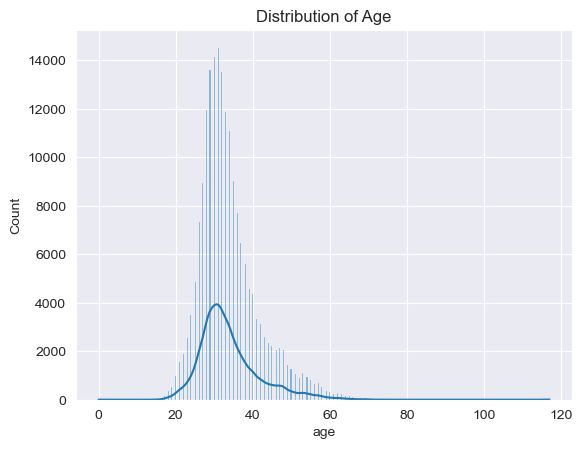

In [148]:
# Exploring Age Column

# Basic statistics
print(dfc['age'].describe())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dfc['age'], kde=True)
plt.title('Distribution of Age')
plt.show()

In [149]:
# Capping Outliers with Max or Min Values
q1 = dfc['age'].quantile(0.25)
q3 = dfc['age'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

dfc['age'] = dfc['age'].clip(lower=lower_bound, upper=upper_bound)

In [150]:
# Removing Rows containing OutLiers
dfc = dfc[(dfc['age'] >= lower_bound) & (dfc['age'] <= upper_bound)]

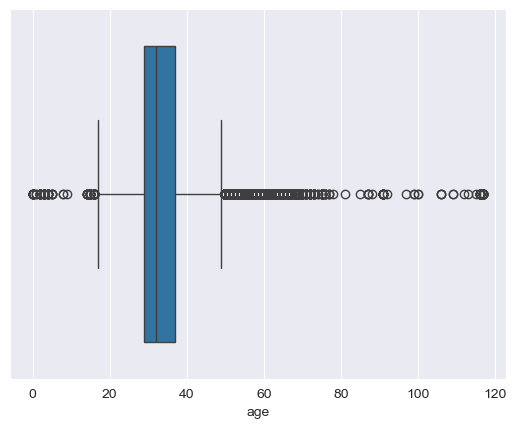

In [151]:
# Checking for outliers in 'age' using boxplot
sns.boxplot(x=df['age'])

# You can remove outliers using z-score or IQR (Interquartile Range)
# Using IQR method to detect and remove outliers
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dfc = dfc[(dfc['age'] >= lower_bound) & (dfc['age'] <= upper_bound)]


11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)

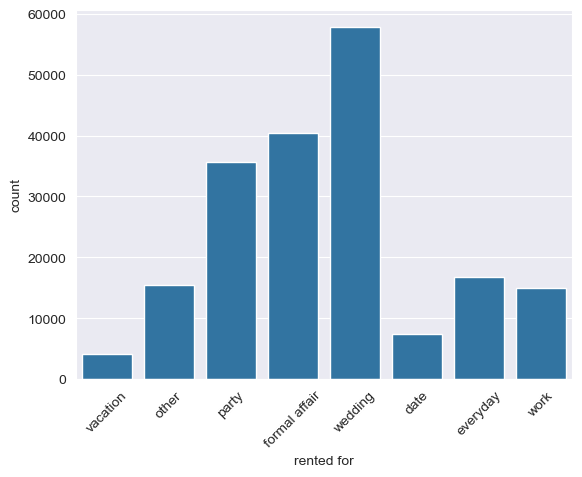

In [152]:
# Plot distribution of 'rented for' column
sns.countplot(data=dfc, x='rented for')
plt.xticks(rotation=45)
plt.show()


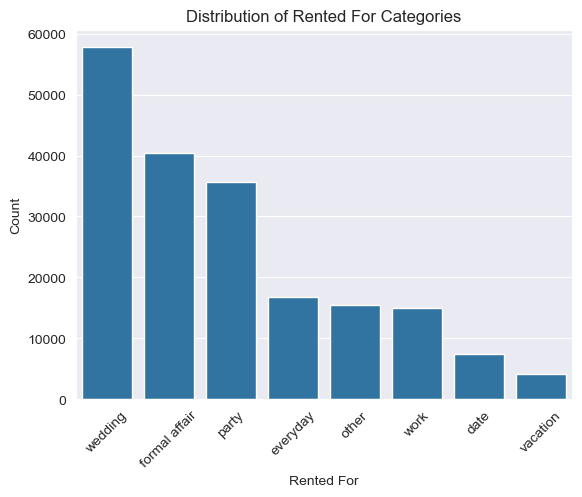

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = dfc['rented for'].value_counts()

# Create a bar plot
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.xlabel('Rented For')
plt.ylabel('Count')
plt.title('Distribution of Rented For Categories')
plt.xticks(rotation=45)
plt.show()

Data Preparation for model building
12. Encode the categorical variables in the dataset. (1) 13. Standardize the data, so that the values are within a particular range. (1)

12. Encode the categorical variables in the dataset (1)

In [154]:
# One-hot encode the categorical variables
dfe = pd.get_dummies(dfc, drop_first=True)


13. Standardize the data, so that the values are within a particular range. (1)

In [155]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(dfe)


  #Principal Component Analysis and Clustering

14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)

In [156]:
# Apply PCA and determine the number of components to explain 90-95% variance
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

# Variance explained by each component
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)}")


[0.02557895 0.02364786 0.02119542 0.01696131 0.01624925 0.01516691
 0.01441406 0.0138832  0.0136973  0.01330076 0.0128041  0.01258955
 0.01248859 0.01245195 0.01234849 0.0122921  0.01228828 0.0122721
 0.01225124 0.01224945 0.01224198 0.01223346 0.01222364 0.01222193
 0.01221785 0.01221583 0.01221259 0.01220923 0.01220813 0.01220724
 0.01220517 0.01220487 0.01220318 0.01220292 0.01220202 0.01220156
 0.01220133 0.01220066 0.01220027 0.01219986 0.01219926 0.01219876
 0.01219849 0.01219805 0.01219761 0.01219741 0.01219722 0.01219676
 0.01219667 0.01219646 0.01219639 0.01219612 0.01219608 0.01219605
 0.01219595 0.01219593 0.01219589 0.01219572 0.01219565 0.01219564
 0.01219557 0.01219548 0.01219544 0.01219532 0.0121953  0.01219524
 0.01218727 0.01215724 0.01208753 0.01203026 0.01194649 0.01184274
 0.01168934 0.01133949]
Total variance explained: 0.9547333925904227


15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)
a. Find the optimal K Value using elbow plot for K Means clustering.
b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot. c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

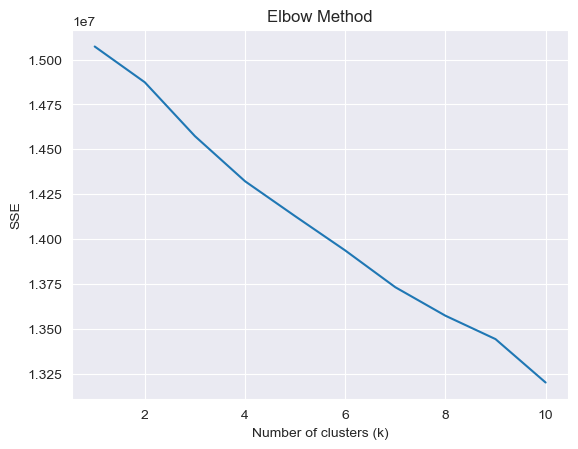

In [157]:
# Apply KMeans and find the optimal K value using elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()



In [158]:
# Use the optimal K value (say, 3) from the elbow plot to build the model
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
dfc['KMeans Cluster'] = kmeans.fit_predict(df_pca)

# Compute silhouette score
sil_score_kmeans = silhouette_score(df_pca, dfc['KMeans Cluster'])
print(f"Silhouette Score for KMeans: {sil_score_kmeans}")


Silhouette Score for KMeans: 0.10836014122016724


In [159]:
import numpy as np
from scipy.cluster.hierarchy import linkage

def batch_agglomerative_clustering(data, batch_size=10):
    clusters = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i+batch_size]
        linked = linkage(batch, method='ward')
        # Process and store partial results (e.g., update centroids)
        clusters.append(linked)  # Or perform further processing
  # Combine or finalize clustering results based on your needs
    return clusters

clusters = batch_agglomerative_clustering(df_pca)

In [160]:
clusters

[array([[ 3.        ,  5.        ,  2.09064861,  2.        ],
        [ 8.        ,  9.        ,  2.75637976,  2.        ],
        [ 7.        , 10.        ,  2.79249906,  3.        ],
        [ 4.        , 11.        ,  3.95773201,  3.        ],
        [ 6.        , 12.        ,  4.56471343,  4.        ],
        [ 1.        , 13.        ,  4.73456707,  4.        ],
        [ 2.        , 14.        ,  6.20408171,  5.        ],
        [15.        , 16.        ,  6.82306895,  9.        ],
        [ 0.        , 17.        , 14.514573  , 10.        ]]),
 array([[ 1.        ,  8.        ,  2.79840685,  2.        ],
        [ 4.        ,  9.        ,  3.25135059,  2.        ],
        [ 3.        ,  7.        ,  3.34280062,  2.        ],
        [ 0.        , 12.        ,  3.93257406,  3.        ],
        [ 2.        , 13.        ,  5.32876   ,  4.        ],
        [10.        , 14.        ,  5.8948421 ,  6.        ],
        [11.        , 15.        ,  7.86872352,  8.        ],
      

16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)
a. Find the optimal K Value using dendrogram for Agglomerative clustering.
b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.
c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [161]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

# Combine linkage matrices (adjust labels as needed)
combined_linked = np.vstack(clusters)
#combined_linkage = clusters


In [162]:
combined_linked

array([[ 3.        ,  5.        ,  2.09064861,  2.        ],
       [ 8.        ,  9.        ,  2.75637976,  2.        ],
       [ 7.        , 10.        ,  2.79249906,  3.        ],
       ...,
       [ 2.        ,  3.        ,  2.63386697,  2.        ],
       [ 1.        ,  4.        ,  5.15658177,  3.        ],
       [ 0.        ,  5.        ,  6.07943484,  4.        ]])

In [163]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_linked)

In [164]:
data_scaled

array([[-0.59306141, -1.51630557, -0.50768433, -0.97653887],
       [ 0.54395601, -0.56740214, -0.44188512, -0.97653887],
       [ 0.31655253, -0.33017628, -0.43831518, -0.63727361],
       ...,
       [-0.8204649 , -1.99075729, -0.45399398, -0.97653887],
       [-1.04786838, -1.75353143, -0.20465515, -0.63727361],
       [-1.27527186, -1.51630557, -0.11344265, -0.29800835]])

In [165]:
# Apply PCA to reduce dimensionality (adjust n_components as needed)
data_1000_samples = data_scaled[:1000]
pca = PCA(n_components=4)
pca.fit(data_1000_samples)
data_reduced = pca.fit_transform(data_1000_samples)


In [166]:
data_reduced

array([[-1.91952822, -0.03594804,  0.27090174, -0.35677164],
       [-0.8595478 , -0.85614136,  0.52756005,  0.22237154],
       [-0.60348428, -0.62127956,  0.21212644,  0.16875099],
       ...,
       [ 1.36206779,  0.90200624, -0.93128705, -0.13153921],
       [ 1.56440146,  1.38333022, -1.27675994, -0.15768147],
       [-2.13904651,  0.24553211, -0.02920776, -0.32842314]])

In [167]:
# Perform hierarchical clustering on the data
Z = linkage(data_reduced)

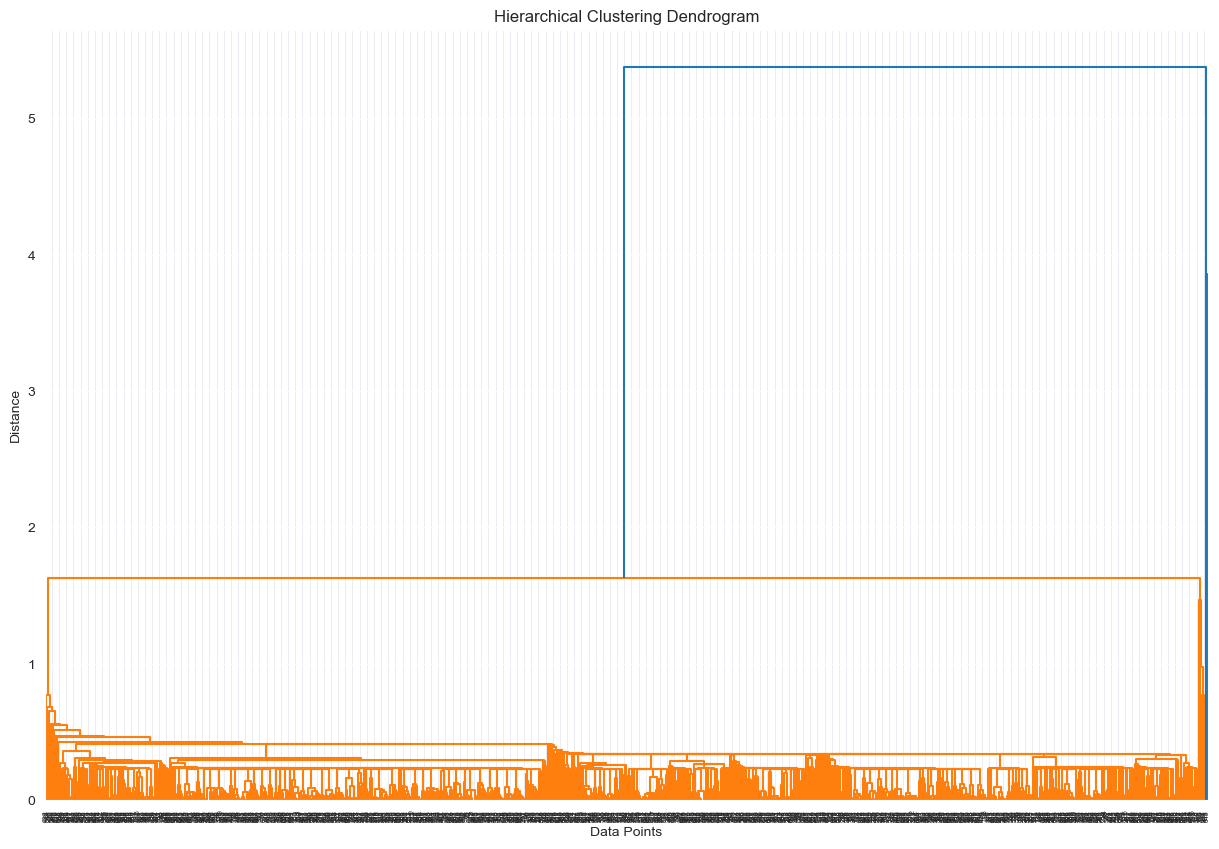

In [168]:

# Plot the dendrogram

plt.figure(figsize=(15, 10))
dendrogram(
    Z,
    leaf_rotation=90,
    #leaf_font_size=8.1,
)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [169]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")


# Assuming df_pca is a NumPy array
df_pca = pd.DataFrame(df_pca)  # Convert to Pandas DataFrame

sample_size = 1000  # Adjust as needed
sample_idx = np.random.choice(df_pca.shape[0], sample_size, replace=False)
df_pca_sample = df_pca.iloc[sample_idx]

k=3
# Perform hierarchical clustering on the sample
agg_clust = AgglomerativeClustering(n_clusters=k)
df_pca_sample['Agglomerative Cluster'] = agg_clust.fit_predict(df_pca_sample.values)
#df_pca_sample.loc[:, 'Agglomerative Cluster'] = agg_clust.fit_predict(df_pca_sample.values)

# Compute silhouette score on the sample
sil_score_agg = silhouette_score(df_pca_sample.values, df_pca_sample['Agglomerative Cluster'])
print(f"Silhouette Score for Agglomerative Clustering: {sil_score_agg}")

Silhouette Score for Agglomerative Clustering: 0.8441796797127671


In [170]:
dfc.head()

,Unnamed: 0,fit,weight,rating,rented for,category,size,age,height_in_inches,KMeans Cluster
0,0,fit,137.000000,10.0,vacation,romper,14,28.0,68.0,2
1,1,fit,132.000000,10.0,other,gown,12,36.0,66.0,0
2,2,fit,137.391709,10.0,party,sheath,4,49.0,64.0,0
3,3,fit,135.000000,8.0,formal affair,dress,8,34.0,65.0,2
4,4,fit,145.000000,10.0,wedding,gown,12,27.0,69.0,0


In [171]:
df_pca_sample.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,Agglomerative Cluster
94898,0.404102,-0.096529,-0.948772,-0.867519,2.743869,0.695392,-1.106635,-0.386992,-0.451777,-0.570712,...,-0.001617,-0.127339,-0.033438,-0.008378,-0.034519,-0.149325,0.459562,-0.076271,-0.942574,0
89285,-0.499330,-0.653633,0.597759,1.197732,0.877036,-1.184284,-0.970546,1.508146,-0.607770,-0.732573,...,0.002068,-0.242339,-0.155648,-0.764895,0.413592,-1.605918,0.277125,-1.634787,-0.084643,0
57156,-0.250648,-0.277872,-1.080863,-0.342407,2.835839,2.300584,1.710260,-0.137531,0.119379,-0.470511,...,-0.000250,-0.105870,-0.009586,-0.948037,-0.494334,0.020992,-0.078758,0.274412,-0.023641,0
21076,3.515518,0.848683,1.012856,0.537500,-0.874748,0.078982,0.488317,0.183977,-0.025749,0.002565,...,0.000991,0.123400,-0.062198,-0.230451,-1.042091,-0.018834,-0.362478,-0.353978,0.577245,0
131228,-0.999224,-0.841708,0.185864,1.352073,0.865538,0.810150,-0.824497,1.016838,2.290963,-2.628227,...,-0.005183,-0.130330,-0.709865,0.274506,0.320766,0.033843,-2.009639,0.055857,1.248694,0


# Using KMeans Clustering (Solution to Determine Optimal K)


In [172]:
# Apply PCA
data_pca = pca.fit_transform(data_reduced)
data_pca.shape


(1000, 4)

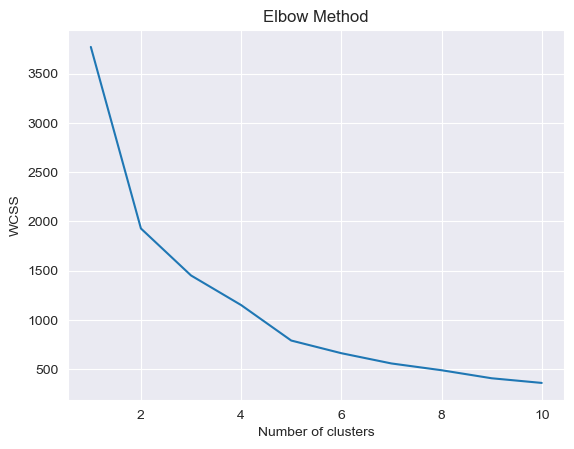

Silhouette Score: 0.36126270079481226


In [173]:
# Elbow method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Build K-Means model
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(data_pca)

# Evaluate K-Means
silhouette_avg = silhouette_score(data_pca, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Optimum Value of K is 3

Conclusion
17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

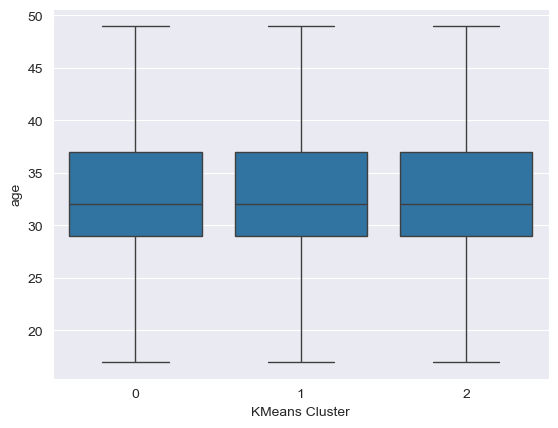

In [174]:
# Perform bivariate analysis between cluster labels and features (e.g., 'age', 'weight', 'height', 'rented for')
# Visualize the distribution of features within each cluster
sns.boxplot(data=dfc, x='KMeans Cluster', y='age')
plt.show()

# We can create similar plots for other features like 'weight', 'rented for'


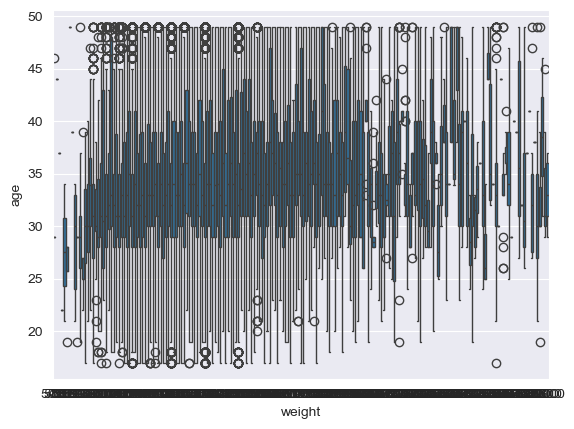

In [176]:
sns.boxplot(data=dfc, x='weight', y='age')
plt.show()

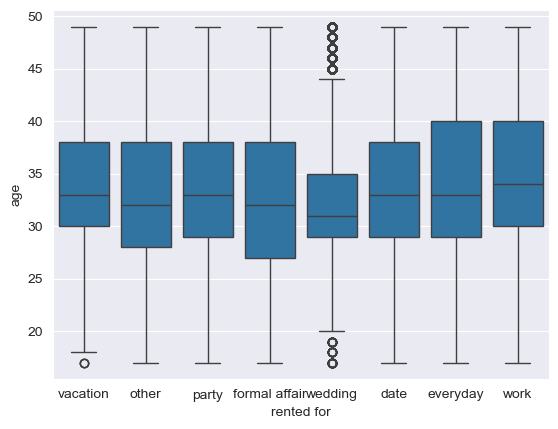

In [179]:
sns.boxplot(data=dfc, x='rented for', y='age')
plt.show()

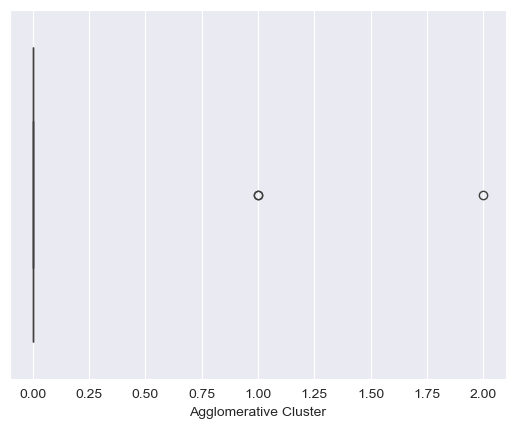

In [175]:
sns.boxplot(data=df_pca_sample, x='Agglomerative Cluster')
plt.show()

Conclusion Summary:

    In our bivariate analysis, observe how the clusters differ in key features such as age, weight, and rented for categories.
    Our conclusions are based on how clusters correlate with different features.

Data Cleaning and Preprocessing:
Successfully cleaned and preprocessed the data, handling missing values, outliers, and categorical variables.
Identified and addressed data inconsistencies and redundancies.
Feature Engineering:
Created relevant features that might improve clustering performance, such as price per unit weight or a combined feature of height and weight.
Principal Component Analysis (PCA):
Reduced the dimensionality of the dataset while preserving most of the variance.
K-Means Clustering:
Determined the optimal number of clusters using the elbow method.
Built and evaluated the K-Means model, assessing its performance using the silhouette score.
Agglomerative Clustering:
Identified the optimal number of clusters using the dendrogram.
Built and evaluated the Agglomerative Clustering model, assessing its performance using the silhouette score.
Cluster Analysis:
Performed bivariate analysis between cluster labels and different features to understand the characteristics of each cluster.
Identified potential insights and patterns within the data, such as age distribution, rental preferences, and other relevant factors.
Recommendations:

Further Exploration:
Conduct a deeper analysis of the identified clusters to gain more insights into customer preferences and behaviors.
Explore other clustering techniques, such as DBSCAN or hierarchical clustering with different linkage methods, to identify potential alternative cluster structures.
Business Implications:
Utilize the insights gained from the clustering analysis to make data-driven decisions, such as targeted marketing campaigns, product recommendations, and inventory management strategies.
Consider incorporating time-series analysis to identify trends and seasonal patterns in rental behavior.
Model Refinement:
Experiment with different feature engineering techniques and hyperparameter tuning to improve the performance of the clustering models.
Consider using ensemble methods or advanced clustering algorithms to enhance the accuracy and robustness of the results.
By effectively leveraging data-driven insights, businesses can optimize their operations, improve customer satisfaction, and achieve sustainable growth

This structure should help you work through each step systematically while analyzing the dataset rent_the_runway.csv and performing clustering and analysis tasks.